In [16]:
from math import ceil
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline

In [17]:
dt = 0.01
def plot_models(models, figsize=(8,8)):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection="3d")
    for piece in models:
            ax.plot(piece[:, 0].flatten(), piece[:, 1].flatten(), piece[:, 2].flatten(), lw=0.5)
    plt.draw()
    plt.show()

def plot_model(model, figsize=(5,5)):
    plot_models([model], figsize)


def calc_mean_lorenz(lorenz_models):
    return np.array([np.mean(lorenz_models[:,i,:], axis=0) for i in range(lorenz_models.shape[1])])


def calc_weighted_average_lorenz(lorenz_models, weights):
    return np.array([np.average(lorenz_models[:,i,:], axis=0, weights=weights) for i in range(lorenz_models.shape[1])])

def lorenz_step(coords,parameters, d =dt):
    rho, sigma, beta = parameters
    x, y, z = coords
    return coords + (np.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])* dt)

def generate_lorenz(x=1, y=1, z=1, sigma=10.0, rho=28.0, beta=8.0/3.0, start=0.0, number_of_samples=4000, plot=False):
    size = number_of_samples
    if start:
        size += ceil(start/dt)

    coords = np.empty([size,3])

    # Set initial values
    coords[0] = [x,y,z]
    parameters = [rho, sigma, beta]
    for i in range(size - 1):
        coords[i+1] = lorenz_step(coords[i],parameters)
    coords= coords[-number_of_samples:]
    if plot:
        plot_model(coords)
    return coords


4d-var

In [18]:
from data_assimilation import assimilateLorenz

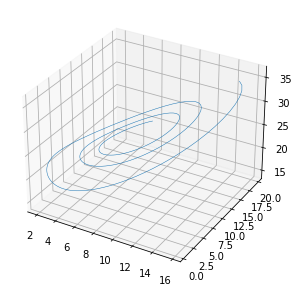

In [19]:
model = dict(
    x = 1.,
    y = 1.,
    z = 1.,
    sigma = 10.0,
    rho = 28.0,
    beta = 8.0/3.0
)

data = generate_lorenz(**model, number_of_samples=200, start=4.5)
plot_model(data)

In [20]:
initial = dict(
x=data[0][0], y=data[0][1],z=data[0][2],
    sigma = 10.0,
    rho = 20.,
    beta = 5.
)
error_vector = [0.1, 0.1, 0.1, 100, 100, 100]
result = assimilateLorenz(initial, data, lorenz_step, verbose=True, error_vector=error_vector)

  Intermediate CurrentState at the current iteration: [10.14216278  8.53511209 30.91601828 20.         10.          5.        ]
  Intermediate CurrentState at the current iteration: [10.20212489  8.51162765 31.01625669 19.91960922  9.98454024  4.01050336]
  Intermediate CurrentState at the current iteration: [10.14378931  8.53447505 30.91873735 19.99781932  9.99958064  4.97315891]
  Intermediate CurrentState at the current iteration: [10.14222296  8.53824064 30.91770885 20.01614814  9.99788612  4.88451648]
  Intermediate CurrentState at the current iteration: [10.13708561  8.54216462 30.91034932 20.03066242  9.99686422  4.89506753]
  Intermediate CurrentState at the current iteration: [10.11767405  8.55840315 30.88312516 20.09368097  9.99251983  4.88630624]
  Intermediate CurrentState at the current iteration: [10.02938779  8.63366758 30.75995731 20.38774196  9.97195445  4.79752694]
  Intermediate CurrentState at the current iteration: [ 9.81282367  8.82028547 30.45902948 21.11501977  

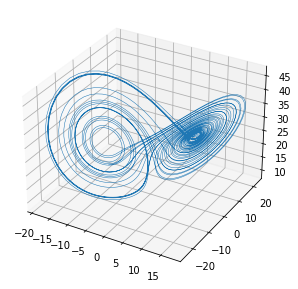

array([[10.14214028,  8.53511758, 30.91598641],
       [ 9.98143753,  8.15401826, 30.95720287],
       [ 9.79869506,  7.77730209, 30.94556488],
       ...,
       [-6.49322009, -8.97591086, 20.13255718],
       [-6.74148991, -9.39699911, 20.1785141 ],
       [-7.00704162, -9.83031067, 20.2739176 ]])

In [21]:
generate_lorenz(**result, plot=True)